In [1]:
import pandas as pd
import os
#import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
model = "cXVAE_fusedEmbed" #"XVAE_scGAN_multiclass"
PATH = f"/trinity/home/skatz/PROJECTS/Multi-view-Deconfounding-VAE/lightning_logs/confounded_categ/stability/{model}"

In [6]:
df = pd.DataFrame()
for folder in os.listdir(f"{PATH}"):   ### XVAE_adversarialTrg
    try: 
        tmp = pd.read_csv(f"{PATH}/{folder}/epoch150/results_performance.csv") ## cufoff_corr: results_performance_removeLatFeatures_pvalueCutoff.csv
        tmp["run"] = folder
        df = pd.concat([df, tmp], axis=0)
    except FileNotFoundError:
        print("Somethign went wrong")
        continue

In [8]:
df.to_csv("tmp.csv", index=False)

In [9]:
df

,RelErr_X1,RelErr_X2,RelErr_X1X2,deconfounding_corrcoef,CC_dispersion,ss,db,ari_trueCluster,nmi_trueCluster,ari_confoundedCluster,nmi_confoundedCluster,run
0,0.189455,0.210476,0.202182,[42.42097174210679],0.928895,0.135303,2.186322,0.704074,0.752207,-0.000259,0.002214,run_11044
0,0.195329,0.211437,0.205081,[33.62966063584242],0.905961,0.118201,2.283036,0.582922,0.688683,0.001285,0.004011,run_43654
0,0.184455,0.208286,0.198883,[36.723294017341985],0.961528,0.137908,2.073371,0.874996,0.853872,0.000239,0.002593,run_68663
0,0.191072,0.210860,0.203052,[17.687089078398508],0.942768,0.123881,2.297703,0.712354,0.769619,0.000299,0.002980,run_68451
0,0.196132,0.210321,0.204723,[36.37619359005355],0.916871,0.113658,2.275252,0.649727,0.713109,0.000192,0.002978,run_59255
0,0.186901,0.209990,0.200880,[43.04133396755938],0.925607,0.124951,2.195465,0.638221,0.734082,0.001145,0.004105,run_90391
0,0.187082,0.210230,0.201097,[38.64562458669518],0.913361,0.134772,2.272248,0.647478,0.732292,0.000226,0.002831,run_93773
0,0.191419,0.210592,0.203027,[37.398292980494304],0.919392,0.131782,2.113957,0.638865,0.722597,-0.000133,0.002398,run_22902
0,0.183222,0.208352,0.198436,[37.42119458144281],0.904241,0.119185,2.221601,0.570548,0.664449,0.000171,0.002901,run_48127
0,0.189197,0.208541,0.200908,[35.225302297601054],0.920971,0.135625,2.256208,0.680499,0.747193,-0.000086,0.002426,run_5392


Text(0.5, 1.0, 'ARI - true')

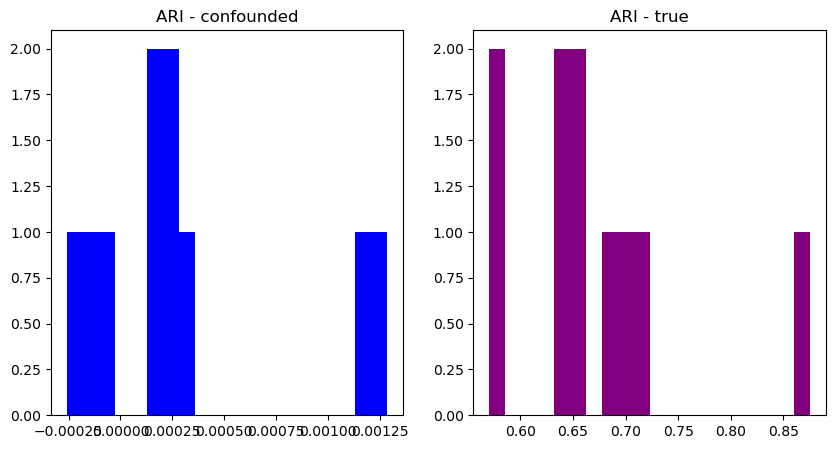

In [10]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.hist(df["ari_confoundedCluster"], bins=20, color="blue")
ax2.hist(df["ari_trueCluster"], bins=20, color="purple")
#ax1.violin(df["ari_confoundedCluster"])
ax1.set_title("ARI - confounded")
ax2.set_title("ARI - true")

{'whiskers': [<matplotlib.lines.Line2D at 0x2aac6690ae30>,
 'caps': [<matplotlib.lines.Line2D at 0x2aac6690b3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2aac6690ab90>],
 'medians': [<matplotlib.lines.Line2D at 0x2aac5e63ad70>],
 'fliers': [<matplotlib.lines.Line2D at 0x2aac6690b670>],
 'means': []}

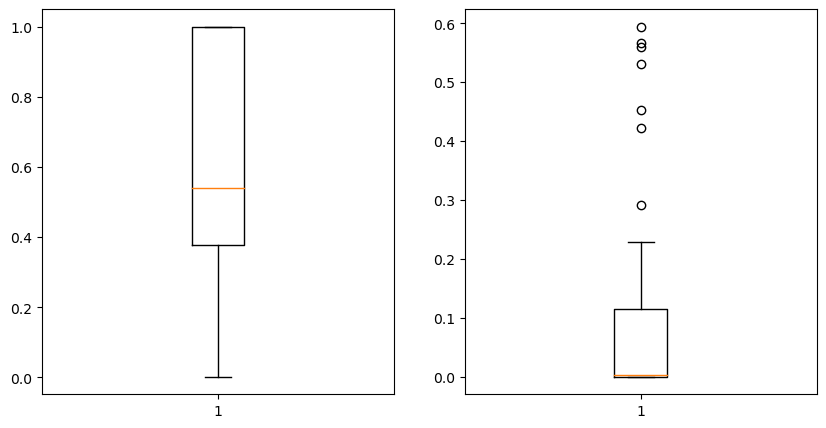

In [9]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.boxplot(df["ari_confoundedCluster"])
ax2.boxplot(df["ari_trueCluster"])